![example](./images/banner-949931_1280.jpg)

# Movie Analysis for Microsoft Studios

**Authors**: [Paul Lindquist](https://www.linkedin.com/in/paul-lindquist/), [Steven Addison](https://www.linkedin.com/in/addisonse/), [Sumedh Bhardwaj](https://www.linkedin.com/in/sumedh-bhardwaj-932767202/), [Wahaj Dar](https://www.linkedin.com/in/wahaj-dar-/)

## Overview
***
This project postulates that Microsoft is launching a movie studio. We use exploratory data analysis to pitch recommendations to their stakeholders.

## Business Problem
***
As this is a new venture for Microsoft, we want to be cognizant of cost and profitability. We offer several, data-driven approaches to maximize return.

Questions we'll answer:
* What genres of movies are lower risk to target as an entry point into the industry?
* Are there types of movies or specific directors and actors that yield higher revenues?
    * Does Microsoft have a catalogue of such content at their disposal?
* When is the most profitable time to release movies?
* Who are Microsoft's competitors and can anything be learned from their releases?

## Data
***
We use historical and categorical data from the box office and current movie landscape – release date, directors, actors, etc. – to examine correlations.

Focuses:
* Particular focus given to cost (budget) and gross revenue (worldwide)
* Drawing a correlation between revenue and genres, directors, actors, release date, etc.
* Sourced from: [Box Office Mojo](https://www.boxofficemojo.com/), [The Numbers](https://www.the-numbers.com/), [IMDB](https://www.imdb.com/)

## Topic 1: Entry Point Movies
***

### 1.1 Data Import
Using a table that highlights both cost ('production budget') and revenue ('worldwide gross').

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Open DataFrame highlighting production budget and worldwide gross revenue
b_and_p = pd.read_csv('./data/zippedData/tn.movie_budgets.csv.gz')

### 1.2 Data Cleaning and Filtering
The 'gross revenue' and 'production budget' columns need to be changed to integers to run calculations. We then run a simple '(revenue - budget) / revenue' calculation to create a sortable 'profit margin' column. Finally, we create a 'top 50' list of movies sorted by 'profit margin' with corresponding genres.

In [3]:
# Convert string columns to integers and date-time columns
# Strip dollar signs and commas from integers
b_and_p['worldwide_gross'] = b_and_p['worldwide_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['production_budget'] = b_and_p['production_budget'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['domestic_gross'] = b_and_p['domestic_gross'].str.replace(',', 
                                '').str.replace('$', '').astype(int)
b_and_p['release_date'] = pd.to_datetime(b_and_p['release_date'])
b_and_p.dropna(subset=['production_budget', 'worldwide_gross'])
b_and_p.at[5189, 'movie'] = "God's Not Dead"
b_and_p.at[2996, 'movie'] = "The King's Speech"

In [4]:
# Filter by movies that grossed at least $1M worldwide and were made in the last 20 years
# Create a gross profit margin column and sort by it
b_and_p = b_and_p[b_and_p['worldwide_gross'] >= 1000000]
b_and_p = b_and_p[b_and_p['release_date'].dt.year >= 1999]
b_and_p['profit_margin_percent'] = (b_and_p['worldwide_gross'] - b_and_p['production_budget']) / b_and_p['worldwide_gross'] * 100
b_and_p['gross_margin_percent'] = b_and_p['worldwide_gross'] / b_and_p['production_budget'] * 100
b_and_p = b_and_p.sort_values(by=['gross_margin_percent'], ascending=False).reset_index(drop=True)

In [5]:
# Create a Top 50 list and hardcode genre/sorted genre for each movie
pd.options.mode.chained_assignment = None
top_50 = b_and_p.iloc[:50]
top_50['genre'] = ['Horror', 'Horror', 'Horror', 'Documentary', 'Musical', 'Comedy', 'Thriller',
                    'Christian', 'Horror', 'Documentary', 'Horror', 'Comedy', 'Christian',
                    'Horror', 'Horror', 'Horror', 'Thriller', 'Christian', 'Documentary', 'Horror',
                    'Romance', 'Foreign', 'Drama', 'Horror', 'Horror', 'Foreign', 'Horror',
                    'Documentary', 'Horror', 'Documentary', 'Comedy', 'Horror', 'Foreign', 'Horror',
                    'Foreign', 'Horror', 'Horror', 'Drama', 'Horror', 'Drama', 'Horror', 'Drama',
                    'Drama', 'Horror', 'Horror', 'Horror', 'Documentary', 'Comedy', 'Drama',
                    'Horror']

top_50['genre_sorted'] = ['Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror', 'Horror',
                          'Horror', 'Documentary', 'Documentary', 'Documentary', 'Documentary',
                          'Documentary', 'Documentary', 'Drama', 'Drama', 'Drama', 'Drama', 'Drama',
                          'Drama', 'Foreign', 'Foreign', 'Foreign', 'Foreign', 'Comedy', 'Comedy',
                          'Comedy', 'Comedy', 'Christian', 'Christian', 'Christian', 'Thriller',
                          'Thriller', 'Musical', 'Romance']

### 1.3 Data Analysis and Calculations
We merge our previous table with another table that has more movies and corresponding genres to create a larger dataset of movies. Then we filter down to a table of single genres and run averages on the budgets and gross revenues. We run another calculation to get return on investment (ROI) variables.

In [6]:
# Filter tables by genre, create averages for budget, revenue & ROI
genre_data = pd.read_csv('./data/zippedData/imdb.title.basics.csv.gz')
gross_genre_merge = b_and_p.merge(genre_data, left_on=['movie'], right_on=['primary_title'])
gross_genre_merge['genres'] = gross_genre_merge['genres'].str.replace(',', '')

horror_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("orro")==True]
horror_genre = horror_genre.drop_duplicates(subset=['movie'])
horror_budg = horror_genre['production_budget'].mean()
horror_rev = horror_genre['worldwide_gross'].mean()

drama_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("rama")==True]
drama_genre = drama_genre.drop_duplicates(subset=['movie'])
drama_budg = drama_genre['production_budget'].mean()
drama_rev = drama_genre['worldwide_gross'].mean()

comedy_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("omedy")==True]
comedy_genre = comedy_genre.drop_duplicates(subset=['movie'])
comedy_budg = comedy_genre['production_budget'].mean()
comedy_rev = comedy_genre['worldwide_gross'].mean()

action_genre = gross_genre_merge[gross_genre_merge['genres'].str.contains("ction")==True]
action_genre = action_genre.drop_duplicates(subset=['movie'])
action_budg = action_genre['production_budget'].mean()
action_rev = action_genre['worldwide_gross'].mean()

horror_roi = ((horror_rev - horror_budg) / horror_budg) * 100
drama_roi = ((drama_rev - drama_budg) / drama_budg) * 100
comedy_roi = ((comedy_rev - comedy_budg) / comedy_budg) * 100
action_roi = ((action_rev - action_budg) / action_budg) * 100

### 1.4 Data Visualization
We plot a bar chart to compare the genre subgroups against each other. A second bar chart compares each genre's cost (budget), revenue and ROI.

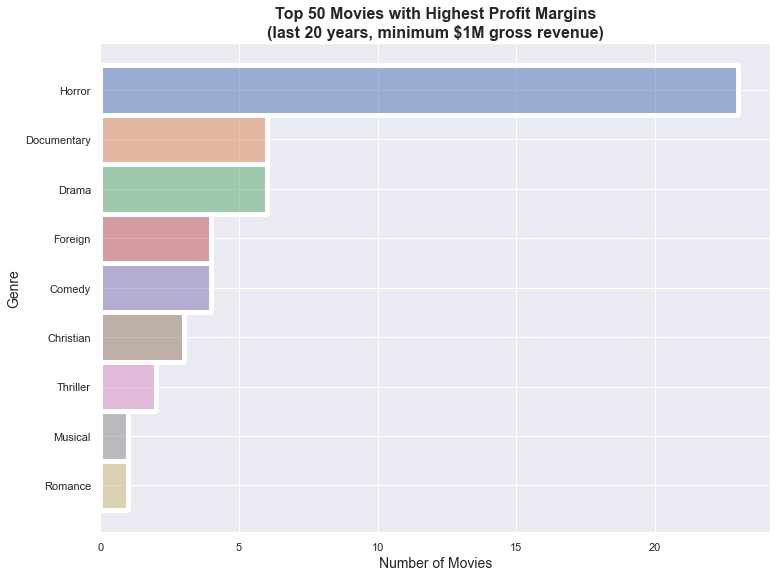

In [20]:
# Plot histogram highlighting Top 50 movies w/ highest GM by genre
genre_hist = sns.histplot(data=top_50, y='genre_sorted', hue="genre_sorted", legend=False)
sns.set(rc={'figure.figsize':(12,9)})
plt.xlabel('Number of Movies', size=14)
plt.ylabel('Genre', size=14)
plt.title('Top 50 Movies with Highest Profit Margins\n(last 20 years, minimum $1M gross revenue)',
         size=16, weight=900);

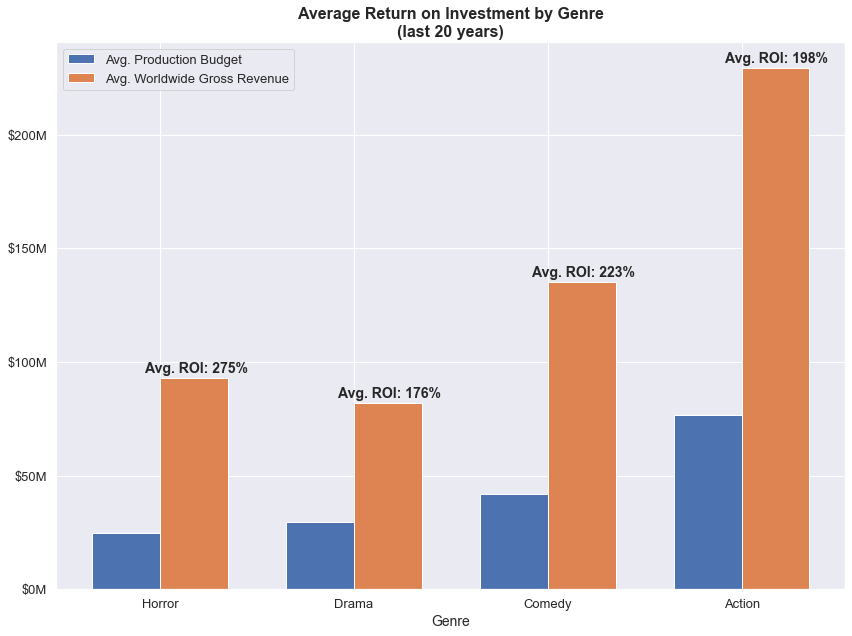

In [22]:
# Plot bar graph with avg. budget, revenue and ROI by genre

from matplotlib.ticker import FuncFormatter

all_labels = ['Horror', 'Drama', 'Comedy', 'Action']
prod_budg = [horror_budg, drama_budg, comedy_budg, action_budg]
all_revs = [horror_rev, drama_rev, comedy_rev, action_rev]
horror_roi = 'Avg. ROI: 275%'
comedy_roi = 'Avg. ROI: 223%'
drama_roi = 'Avg. ROI: 176%'
action_roi = 'Avg. ROI: 198%'

x_paul = np.arange(len(all_labels))
width_paul = 0.35
y_paul = np.arange(4)
def millions(x, pos):
    return '$%1.0fM' % (x*1e-6)
formatter = FuncFormatter(millions)

cost_rev, ax = plt.subplots()
rects1_paul = ax.bar(x_paul - width_paul/2, prod_budg, width_paul, label='Avg. Production Budget')
rects2_paul = ax.bar(x_paul + width_paul/2, all_revs, width_paul, label='Avg. Worldwide Gross Revenue')

ax.set_xlabel('Genre', size=14)
ax.set_title('Average Return on Investment by Genre\n(last 20 years)', size=16, weight=900)
ax.set_xticks(x_paul)
ax.set_xticklabels(all_labels, size=13)
ax.legend()
plt.rc('legend', fontsize=13)
ax.yaxis.set_major_formatter(formatter)
plt.yticks(fontsize=13)

plt.figtext(0.174, 0.415, horror_roi, fontsize=14, weight="bold")
plt.figtext(0.398, 0.377, drama_roi, fontsize=14, weight="bold")
plt.figtext(0.622, 0.563, comedy_roi, fontsize=14, weight="bold")
plt.figtext(0.846, 0.894, action_roi, fontsize=14, weight="bold")

cost_rev.tight_layout();

### 1.5 Evaluation

**An early focus should be placed on making horror movies.** According to the data, they historically yield the lowest average cost and highest average profit margins. They'll serve as an initial, lower-risk entry point.

## Topic 2: Action Genre Profit Analysis 

As we saw in the above section, despite not having the best return on investment, action movies bring in undeniably impressive profits. In this section we will take a closer look at the highest profiting action movies and deliver Microsoft Studios suggestions on directors and cast members to hire so that they know they are investing in the most valuable names in Hollywood.

### 2.1 Data Import

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2.2 Data Cleaning and Filtering 

The data we used to find our conclusion came from several data sets acquired from IMDB that had to be merged together to tell a cohesive story. We also used the data set provided from the website “The Numbers” to draw conclusions based on net profits. 

The biggest hurdle was cleaning up the money data in the “budget” dataframe so that we could sort it by total profits. After removing all commas and dollar signs from the dataframe we were able to then subtract every movie’s world wide gross figure from their budget to then find out the movie’s profit. From that point it was a painless process to merge that large dataframe with genre information taken from IMDB and find the most profitable action movies of the past twenty years.



In [10]:
namesdf = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
titlesdf = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
crewdf = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
principalsdf = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
budgetdf = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

In [45]:
#highest grossing movies
#removed the commas and dollar signs from the data so that it could be converted
#reassigned the data to a float type instead of object so that it may be sorted properly
#assinged that now to an int so that it is easier to read
#since I'm on a PC for some reason I cannot just convert to int
#only selected the movies from the past 20 years
#established a column for net gross by subtracting the budget from the worldwide gross
#merged in my genres so that I may only select action movies
#Avatar is not represented in the IMDB dataset and has to be added manually 
#selected the top 20 grossing action movies from the past 20 years
budgetdf.replace(',','', regex=True, inplace=True)
budgetdf.replace('\$','', regex=True, inplace=True)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(float)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(float)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(float)
budgetdf['production_budget'] = budgetdf['production_budget'].astype(int)
budgetdf['worldwide_gross'] = budgetdf['worldwide_gross'].astype(int)
budgetdf['domestic_gross'] = budgetdf['domestic_gross'].astype(int)
budgetdf['release_date'] = pd.to_datetime(budgetdf['release_date'])
budgetdf = budgetdf[budgetdf['release_date'].dt.year >= 2001]
budgetdf['total_profit'] = budgetdf['worldwide_gross'] - budgetdf['production_budget']
budgetandgenres = budgetdf.merge(genres, left_on=['movie'], right_on=['primary_title'])
actiondf = budgetandgenres[budgetandgenres['genres'].str.contains('Action') == True]
avatar = budgetdf.loc[budgetdf['movie'] == 'Avatar']
editedactiondf = actiondf.append(avatar)
highestactiondf = editedactiondf.sort_values(by='total_profit', ascending=False)
highest20df = highestactiondf.head(20)

### 2.3 Data Analysis and Calculations

From this point we wanted to see who are the cast and crew responsible for these action blockbusters. 

To do so we took the IMDB databases and prepared them to be merged together; databases having the names of the crew, titles of the movies they worked on, and job they performed. Once those were created and combined we were able to merge them with the database we made above showcasing all of the action movies, sorted once again by most profitable.

We focused on three key players to see who are involved with making these huge films.
Firstly we dove into the directors. We did some more minor cleaning so that the Russo Brothers would be treated as a pair instead of individuals since all of their data was identical. We then took my newly formed most profitable directors information and grouped them by the total profits of movies they have made. To make the data a bit less overwhelming we only selected the top 10 to visualize. 

We then repeated this process for actors and actresses, and now the top 10 most profitable directors, actors, and actresses are ready to be visualized. 

In [12]:
# Grab the relevant data in a new dataframe
names = namesdf[['nconst','primary_name']]
# Do the same for the rest of the databases that are intended to be merged
movietitles = titlesdf[['tconst','primary_title']]
crew = principalsdf[['tconst','nconst','category']]
# Merge the names dataframe to principals
crewnames = names.merge(crew, on=['nconst'])
# Merge the titles 
namesandtitles = crewnames.merge(movietitles, on=['tconst'])
# Merge all that to the top profiting action movies dataframe
grosscrew = namesandtitles.merge(highestactiondf, left_on=['primary_title'], right_on=['movie'])
# Copy the dataframe into a new dataframe sorted by the highest total profit
highestgrosscrew = grosscrew.sort_values(by='total_profit', ascending=False)

In [13]:
# Ceated a dataframe for all of the directors in crew dataframe
directors = highestgrosscrew.loc[highestgrosscrew['category'] == 'director']
# We want to treat the Russo Brothers as one since their data is the same and they work as a pair
# Rename them as The Russo Brothers in dataframe and drop the name and title constant columns so that dup value can be dropped
directors.replace('Joe Russo','The Russo Brothers', regex=True, inplace=True)
directors.replace('Anthony Russo','The Russo Brothers', regex=True, inplace=True)
directors = directors.drop(['nconst', 'tconst'], axis=1)
directors = directors.drop_duplicates()
# Group the directors by the sum of their movie's total profit
directorgb = directors.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)
# Select the top 10 profitable directors
top10directors = directorgb.head(10)

In [14]:
# Repeat the process for Actors and Actresses
actors = highestgrosscrew.loc[highestgrosscrew['category'] == 'actor']
actorgb = actors.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)
top10actors = actorgb.head(10)
actresses = highestgrosscrew.loc[highestgrosscrew['category'] == 'actress']
actressesgb = actresses.groupby(['primary_name']).sum().sort_values(['total_profit'], ascending=False)
top10actresses = actressesgb.head(10)

### 2.4 Data Visualization
For these visuals, we wanted to keep them easy to read, concise and on brand. The visual inspiration came from Microsoft’s logo, taking the hexcode value of the four squares seen in their branding and using them as the colors for the four graphs. We really showcase the large profits these creatives are generating.

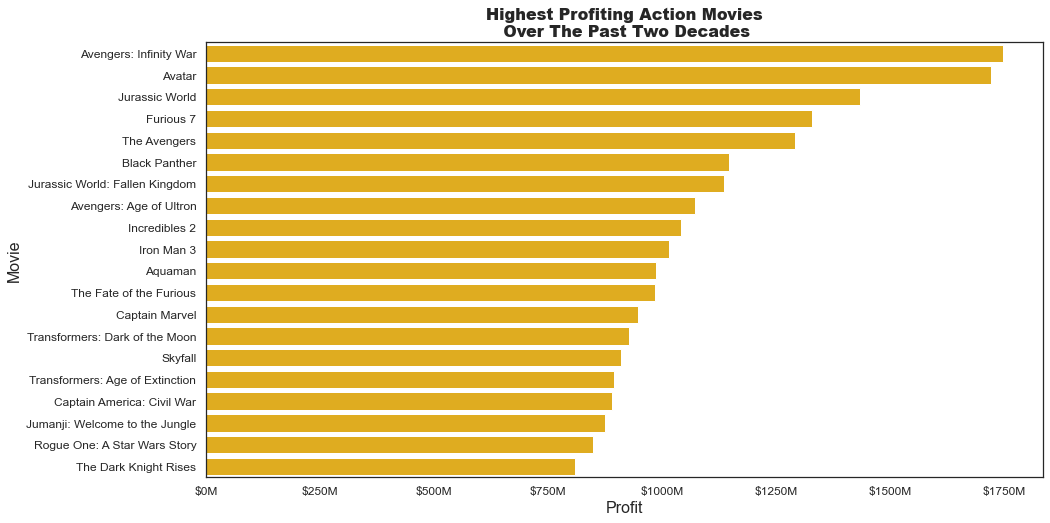

In [46]:
from matplotlib.ticker import FuncFormatter
def millions(y, pos):
    return '$%1.0fM' % (y*1e-6)
sns.set_theme(style="white", palette=None)
stevenmoviefig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = highest20df['movie'], x = highest20df['total_profit'], color='#ffbb00')

ax.set_title('Highest Profiting Action Movies\n Over The Past Two Decades', fontsize= 16, weight=900)
ax.set_xlabel('Profit', fontsize= 16)
ax.set_ylabel('Movie', fontsize= 16)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

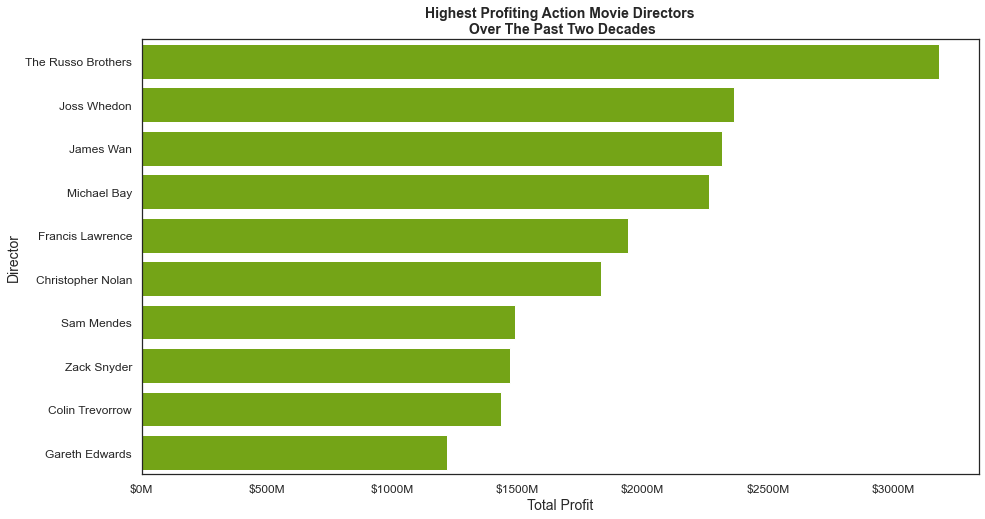

In [16]:
stevendirectorfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10directors.index, x = top10directors['total_profit'], color='#7cbb00')

ax.set_title('Highest Profiting Action Movie Directors\n Over The Past Two Decades', fontsize= 14, weight=900)
ax.set_xlabel('Total Profit', fontsize= 14)
ax.set_ylabel('Director', fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

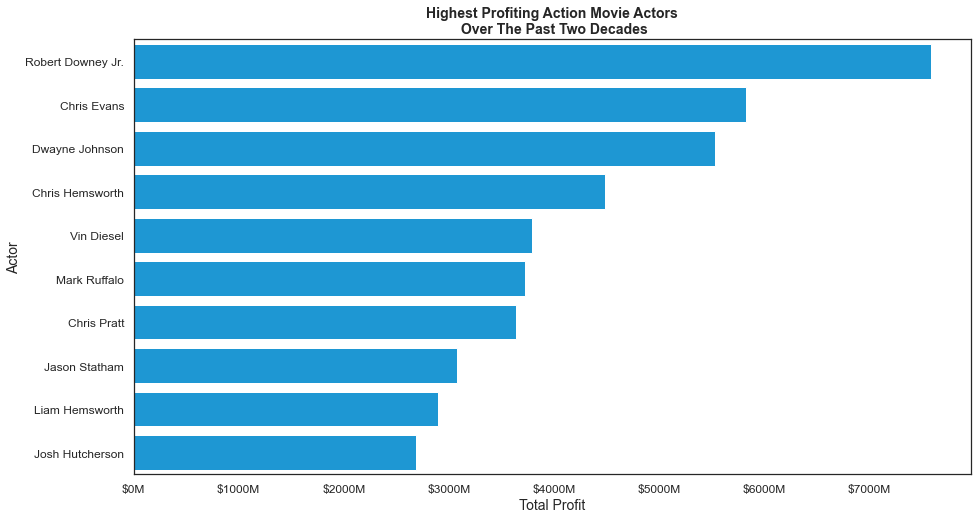

In [17]:
stevenactorfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10actors.index, x = top10actors['total_profit'], color='#00a1f1')

ax.set_title('Highest Profiting Action Movie Actors\n Over The Past Two Decades',fontsize= 14,weight=900)
ax.set_xlabel('Total Profit',fontsize= 14)
ax.set_ylabel('Actor',fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

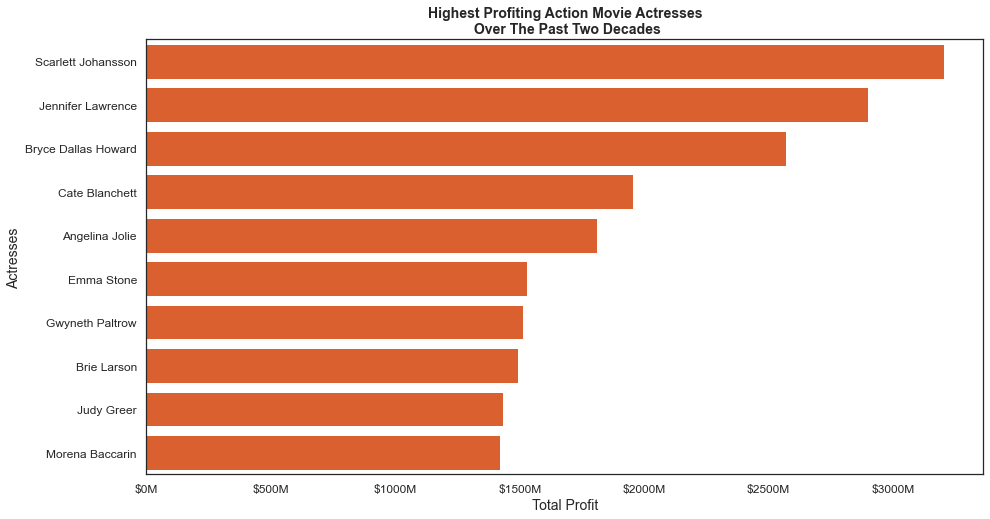

In [18]:
stevenactressfig, ax = plt.subplots(figsize=(15,8))
sns.barplot(y = top10actresses.index, x = top10actresses['total_profit'], color='#f65314')

ax.set_title('Highest Profiting Action Movie Actresses\n Over The Past Two Decades',fontsize= 14,weight=900)
ax.set_xlabel('Total Profit',fontsize= 14)
ax.set_ylabel('Actresses',fontsize= 14)
formatter = FuncFormatter(millions)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### 2.5 Evaluation
Just from a cursory glance one can tell that the most profitable action movies are dominated by the Marvel franchises. It is our suggestion that if Microsoft wants to be able to compete in this very saturated market and earn these incredible billion dollar profits then they either need to acquire untapped intellectual properties, smaller studios that own properties they want to develop, or develop their own properties that they already own through their video game studios. 

## Overall Conclusions
***
Based on our analysis, we make the following suggestions for the business:

* **An early focus should be placed on making horror movies.** According to the data, they historically yield the lowest average cost and highest average profit margins. They'll serve as an initial, lower-risk entry point.
* **When moving into big budget, blockbuster movies, target specific directors and/or actors who've historically yielded high box office revenues.** Top 3 directors: Russo brothers, Joss Whedon, James Wan. Top 3 actors: Robert Downey Jr., Chris Evans, Dwayne 'The Rock' Johnson. Top 3 actresses: Scarlett Johansson, Jennifer Lawrence, Bryce Dallas Howard.
* **Explore creating movie franchises out of Microsoft intellectual property, namely video games.** 2 of the 3 largest studio competitors (Warner Bros, Fox) own DC Comics and Marvel, respectively. A comparable franchise could be fashioned from high-grossing Microsoft games (Halo, Gears of War, Forza Motorsport, etc.)
* **Release big budget movies in June, July and November.** These 3 months historically yield the highest revenues.